<a href="https://colab.research.google.com/github/FaustinoSachimuco/Aula_24_Nov/blob/main/Trab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://drive.google.com/uc?id=1w6y8vYqoevY17_EBEiF3M4nOf6_32V1k'>

>Trabalho nº 2 (Introdução a Algoritmos e Programação)


---


* Elementos do Grupo:
    * Faustino Shacimuco
    * Rui Morais
    * Sandra Andrade


* Professores:
    * Pedro Henriques
    * Paulo Jorge Mendes


---






>Dataset: myheart.csv
_______________

* colunas: idade, sexo, tensão, colesterol, batimento, temDoença
* tamanho: 839
_________________






# Introdução

O presente relatório foi realizado no âmbito da disciplina Introdução a Algoritmos de Programação, de modo a expor os códigos da resolução das tarefas do trabalho de grupo. O nosso grupo optou pela resoluçao do segundo enunciado: Processador de registros de Doenças Cardíacas. E o dataset correspondente ao enuncio é o myheart.csv, que contêm 6 colunas e 839 linhas de registros de dados referentes a doenças cardíacas.

O Google Colab, além de auxiliar na colaboração para a codificação dos resultados, também foi utilizado para a própria elaboração do relatório, aproveitando o *markdown cells* do Colab.

---


Bibliotecas


---



In [ ]:
#Bibliotecas
from graphviz import Digraph # para representação gráfica de grafos direcionados (utiliza linguagem dot)
from tabulate import tabulate # formatar dados em tabelas
from collections import defaultdict # alternativa ao dicionário padrão (dict)
import matplotlib.pyplot as plt # para a criação de gráficos e visualizações
import matplotlib.image as mpimg # operações relacionadas a imagens
%matplotlib inline
from jinja2 import Template # para gerar texto dinâmico, como HTML em páginas da web
import math # operações matemáticas simples
import scipy.stats # análise estatística avançada

from google.colab import drive # Importa a biblioteca drive do Google Colab
drive.mount('/content/drive') # permite acessar e manipular arquivos armazenados no Google Drive (/content/drive)
import base64 # codificar e descodificar dados em formato base64 (representação de dados binários em ASCII)


Mounted at /content/drive



---


## Resolução

---

Para a resolução do enunciado foi utilizado um dataset do qual contém os dados dos pacientes (homens e mulheres) que foram analisados em termos de terem ou não terem doenças de coração.

In [ ]:
# Abrir o ficheiro myheart.csv e ler
with open('myheart.csv', 'r') as file:
    lines = file.readlines()
    #print(lines), out: ['idade,sexo,tensão,colesterol,batimento,temDoença\n', '40,M,140,289,172,0\n', ...

# Remover o cabeçalho e fazer split dos dados
header = lines[0].strip().split(',')
myheart_data = [line.strip().split(',') for line in lines[1:]]
#myheart_data
print(tabulate(myheart_data[:5], headers=header))

  idade  sexo      tensão    colesterol    batimento    temDoença
-------  ------  --------  ------------  -----------  -----------
     40  M            140           289          172            0
     49  F            160           180          156            1
     37  M            130           283           98            0
     48  F            138           214          108            1
     54  M            150           195          122            0


In [ ]:
total_patients = len(myheart_data)

**a) Calcular a percentagem da Doença no total da amostra e por Género (considere como total só os que estão doentes).**


---



In [ ]:
total_sick = 0
total_no_sick = 0
total_male_sick = 0
total_female_sick = 0
total_male_no_sick = 0
total_female_no_sick = 0

for l in myheart_data:
    if l[5] == '1':
        total_sick += 1
        if l[1] == 'M':
            total_male_sick += 1
        elif l[1] == 'F':
            total_female_sick += 1
    elif l[5] == '0':
        total_no_sick += 1
        if l[1] == 'M':
            total_male_no_sick += 1
        elif l[1] == 'F':
            total_female_no_sick += 1

perc_with_disease_gender = {
    'Sexo Masculino': f"{(total_male_sick/total_sick)*100:.2f}%", # f""- formatted-string, útil quando é preciso
                                                                  #construir strings que dependem de variáveis
    'Sexo Feminino': f"{(total_female_sick/total_sick)*100:.2f}%" # ou expressões Python
                    }

perc_with_disease_gender

{'Sexo Masculino': '91.45%', 'Sexo Feminino': '8.55%'}



---



---




Alternativas

In [ ]:
#adiciona todas os 1s que foram gerados quando a condição l[5] == '0' and l[1] == 'M' é satisfeita
total_male_no_sick_al = sum(1 for l in myheart_data if l[5] == '0' and l[1] == 'M')
#adiciona todas os 1s que foram gerados quando a condição l[5] == '0' and l[1] == 'F' é satisfeita
total_female_no_sick_al = sum(1 for l in myheart_data if l[5] == '0' and l[1] == 'F')
percent_male_sick_al = (total_male_sick / total_sick) * 100
percent_female_sick_al = (total_female_sick / total_sick) * 100
print(f"Percentagem de doentes do sexo masculino: {percent_male_sick_al:.2f}%")
print(f"Percentagem de doentes do sexo feminino: {percent_female_sick_al:.2f}%")

Percentagem de doentes do sexo masculino: 91.45%
Percentagem de doentes do sexo feminino: 8.55%




---



---



> #### Representação gráfica do Grafo Direcionado (Dígrafo)



>Cálculos das percentagens

In [ ]:
# Calcular a percentagem de pacientes do sexo feminino e do sexo masculino
#doentes e bem como os saudáveis
percent_patients_no_sick = (total_no_sick / total_patients) * 100
percent_patients_sick = (total_sick / total_patients) * 100
percent_male_sick = (total_male_sick / total_sick) * 100
percent_female_sick = (total_female_sick / total_sick) * 100
percent_male_no_sick = (total_male_no_sick / total_no_sick) * 100
percent_female_no_sick = (total_female_no_sick / total_no_sick) * 100


>Aplicar a linguagem dot e salvar o dígrafo no formato png.:

In [ ]:
# Represenção do digrafo, aplicando cores e percentagens nas arrestas
dot = Digraph(comment='Patient Analysis')

dot.node('A', f'Total Patients: {len(myheart_data)}', color='lightblue2', style='filled')
dot.node('B', f'Disease: {total_sick}', color='lightcoral', style='filled')
dot.node('C', f'No Disease: {total_no_sick}', color='lightgreen', style='filled')
dot.node('D', f'Male:{total_male_sick}', color='lightgoldenrod2', style='filled')
dot.node('E', f'Female: {total_female_sick}', color='lightsalmon', style='filled')
dot.node('F', f'Male:{total_male_no_sick}', color='lightcyan', style='filled')
dot.node('G', f'Female:{total_female_no_sick}', color='lightpink', style='filled')


dot.edge('A', 'B', f"{percent_patients_sick:.1f}%")
dot.edge('A', 'C', f"{percent_patients_no_sick:.1f}%")
dot.edge('B', 'D', f"{percent_male_sick:.1f}%")
dot.edge('B', 'E', f"{percent_female_sick:.1f}%")
dot.edge('C', 'F', f"{percent_male_no_sick:.1f}%")
dot.edge('C', 'G', f"{percent_female_no_sick:.1f}%")

dot.render('/content/drive/MyDrive/Save/patient_dot', format='png', cleanup=True)


'/content/drive/MyDrive/Save/patient_dot.png'

>Apresentar a imagem criada anteriormente, utilizando o matplotlib.image:

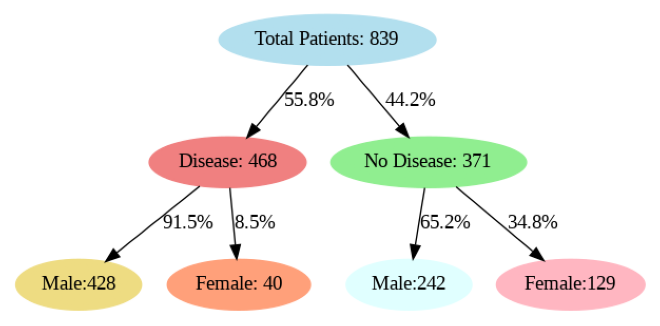

In [ ]:
image = mpimg.imread('/content/drive/MyDrive/Save/patient_dot.png')

fig, ax = plt.subplots() #criar uma subparcela única
ax.imshow(image) #exibir a imagem na subparcela e desativar os eixos
ax.axis('off')
#centralizar a imagem na subparcela
ax.set_position([0, 0, 1, 1])  # Define a posição da subparcela para cobrir toda a figura
#fig.savefig("/content/drive/MyDrive/Save/patient_dot.png")
plt.show() #pode nem ser colocado



---



**b) Calcular a distribuição da Doença por Escalões Etários. Considere os seguintes escalões: [30-34], [35-39], [40-44],..., etc.**

---

>Calcular a distribuição da doença por faixas etárias, implica determinar a proporção de indivíduos que têm a condição de doença em cada faixa etária que foi definida.

>Nota: Proporção amostral de uma categoria (ou classe) é a frequência relativa com que essa categoria se observa na amostra.  
 $$\hat{p} = \frac{X}{n}$$
  onde:
 - $X$, representa o número de sucessos numa amostra de dimensão $n$
 - $n$ é o número total de observações



In [ ]:
# Idade minima e maxima com pacientes doentes
ages_with_disease = [int(l[0]) for l in myheart_data  if l[5] == '1']
min_max_age_disease ={'min age with disease': min(ages_with_disease),
              'max age with disease': max(ages_with_disease)}
min_max_age_disease

{'min age with disease': 31, 'max age with disease': 77}

In [ ]:
# Nível minima e maxima de colesterol dos pacientes doentes

cholesterol_disease = [int(l[3]) for l in myheart_data  if l[5] == '1']
min_max_Chol_disease ={'min cholesterol level with disease': min(cholesterol_disease),
              'max  cholesterol level with disease': max(cholesterol_disease)}
min_max_Chol_disease

{'min cholesterol level with disease': 0,
 'max  cholesterol level with disease': 603}

Função Distribuição


---





In [ ]:
# Função distribuição:
def calculate_distribution(myheart_data, attribute_index, interval, fixed_start_value):
    attribute_range = {}
    max_value = max(int(entry[attribute_index]) for entry in myheart_data)

    min_value = fixed_start_value

    while min_value <= max_value:
        range_label = f"{min_value}-{min_value + interval - 1}"
        attribute_range[range_label] = 0
        min_value += interval

    for entry in myheart_data:
        attribute_value = int(entry[attribute_index])
        for range_label in attribute_range:
            lower, upper = map(int, range_label.split('-'))
            if lower <= attribute_value <= upper:
                attribute_range[range_label] += 1
                break

    disease_percents = []

    for range_label, total_patients in attribute_range.items():
        patients_with_disease = sum(1 for entry in myheart_data if int(entry[attribute_index]) in range(int(range_label.split('-')[0]), int(range_label.split('-')[1]) + 1) and entry[5] == '1')
        disease_percent = (patients_with_disease / total_patients) * 100 if total_patients > 0 else 0
        disease_percents.append(disease_percent)
        print(f"Attribute at Index {attribute_index} {range_label}: Count {total_patients: <5} Disease Percentage: {disease_percent: <.2f}%")

    return attribute_range, disease_percents



>i. Calcular a distribuição da doença por escalões etários: [30-34], [40-44],...



In [ ]:
# Resolução da alínea b):
    ## i) .
    # (implica que o interval é 5 e inicializa a partir de 30 anos)
# a coluna idade está na posição 0 da lista myheart
age_interval = 5
fixed_start_value_for_age = 30 # começa a partir de 30 anos
age_range, age_disease_percents = calculate_distribution(myheart_data, 0, age_interval, fixed_start_value_for_age)


Attribute at Index 0 30-34: Count 17    Disease Percentage: 35.29%
Attribute at Index 0 35-39: Count 53    Disease Percentage: 35.85%
Attribute at Index 0 40-44: Count 88    Disease Percentage: 30.68%
Attribute at Index 0 45-49: Count 107   Disease Percentage: 47.66%
Attribute at Index 0 50-54: Count 168   Disease Percentage: 49.40%
Attribute at Index 0 55-59: Count 172   Disease Percentage: 66.28%
Attribute at Index 0 60-64: Count 135   Disease Percentage: 74.81%
Attribute at Index 0 65-69: Count 65    Disease Percentage: 69.23%
Attribute at Index 0 70-74: Count 23    Disease Percentage: 73.91%
Attribute at Index 0 75-79: Count 7     Disease Percentage: 71.43%


como a incidência da doença varia em diferentes faixas etárias? [ajuda a identificar se existem grupos etários específicos com maior probabilidade de desenvolver a doença]

Dos resultados obtidos, pode ser afirmado que a porcentagem de pacientes com a condição de doença é maior nas faixa etárias: [55-59], [60-64], [65-69], [70-74] e [75-79], que excedem uma porcentagem de 50%. A faixa etária [60-64] tem mais probabilidade de ter doenças (:doenças de coração). Ou seja, é de se notar que existe uma relação entre idade e ocorrência da doenças.



---




Gráfico de Distribuição Doenças (Count) por Escalão Etário

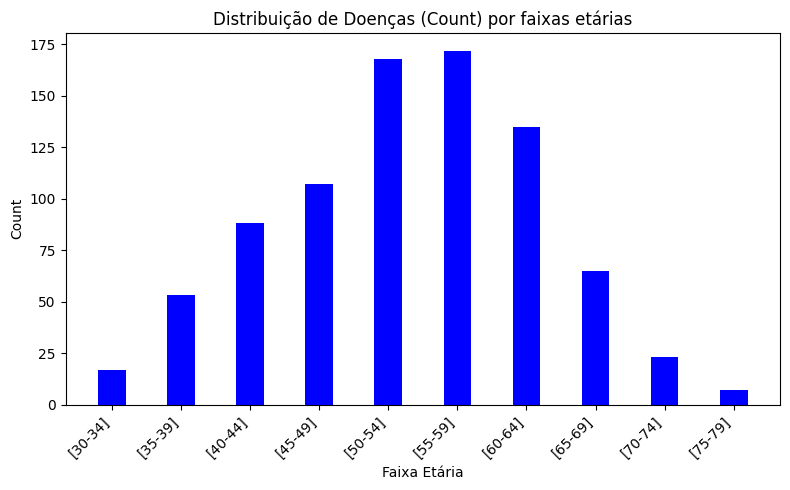

In [ ]:
labels_age = list(age_range.keys())
values_age = list(age_range.values())

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(labels_age, values_age, width=0.4, color='blue')
ax.set_xlabel('Faixa Etária')
ax.set_ylabel('Count')
formatted_labels_age = [f"[{label}]" for label in labels_age]
ax.set_xticks(labels_age)
ax.set_xticklabels(formatted_labels_age, rotation=45, ha='right')
ax.set_title('Distribuição de Doenças (Count) por faixas etárias')

plt.tight_layout()  # Ajuste automático do layout
plt.show()
fig.savefig("/content/drive/MyDrive/Save/count_disease_vs_age_range.png")
#centralizar a imagem na subparcela
ax.set_position([0, 0, 1, 1])  # Define a posição da subparcela para cobrir toda a figura
plt.show() #pode nem ser colocado



---

Gráfico de Distribuição Doenças (%) por Escalão Etário

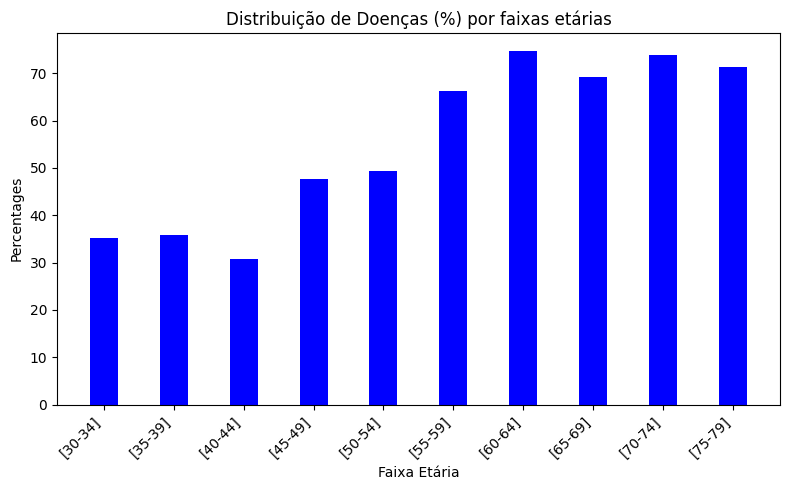

In [ ]:
labels_age = list(age_range.keys())
percent_age = age_disease_percents

fig1, ax1 = plt.subplots(figsize=(8, 5))
ax1.bar(labels_age, percent_age, width=0.4, color='blue')
ax1.set_xlabel('Faixa Etária')
ax1.set_ylabel('Percentages')
formatted_labels_age = [f"[{label}]" for label in labels_age]
ax1.set_xticks(labels_age)
ax1.set_xticklabels(formatted_labels_age, rotation=45, ha='right')
ax1.set_title('Distribuição de Doenças (%) por faixas etárias')

plt.xticks(rotation=45, ha='right')  # rotação dos rótulos para melhor legibilidade
plt.tight_layout()  # Ajuste automático do layout
plt.show()
fig1.savefig("/content/drive/MyDrive/Save/percent_disease_vs_age_range.png")
#centralizar a imagem na subparcela
ax1.set_position([0, 0, 1, 1])  # Define a posição da subparcela para cobrir toda a figura
plt.show() #pode nem ser colocado




---

ii. Calcular a distribuição de doenças por níveis de colesterol, intervalo de 10 unidades

In [ ]:
cholesterol_interval = 10
fixed_start_value_for_cholesterol = 0 # valor minimo
cholesterol_range, cholesterol_disease_percentages = calculate_distribution(myheart_data, 3, cholesterol_interval, fixed_start_value_for_cholesterol)



Attribute at Index 3 0-9: Count 172   Disease Percentage: 88.37%
Attribute at Index 3 10-19: Count 0     Disease Percentage: 0.00%
Attribute at Index 3 20-29: Count 0     Disease Percentage: 0.00%
Attribute at Index 3 30-39: Count 0     Disease Percentage: 0.00%
Attribute at Index 3 40-49: Count 0     Disease Percentage: 0.00%
Attribute at Index 3 50-59: Count 0     Disease Percentage: 0.00%
Attribute at Index 3 60-69: Count 0     Disease Percentage: 0.00%
Attribute at Index 3 70-79: Count 0     Disease Percentage: 0.00%
Attribute at Index 3 80-89: Count 1     Disease Percentage: 0.00%
Attribute at Index 3 90-99: Count 0     Disease Percentage: 0.00%
Attribute at Index 3 100-109: Count 2     Disease Percentage: 50.00%
Attribute at Index 3 110-119: Count 3     Disease Percentage: 100.00%
Attribute at Index 3 120-129: Count 4     Disease Percentage: 50.00%
Attribute at Index 3 130-139: Count 3     Disease Percentage: 33.33%
Attribute at Index 3 140-149: Count 6     Disease Percentage: 33



---

Gráfico de Distribuição Doenças (Count) por Níveis de colesterol

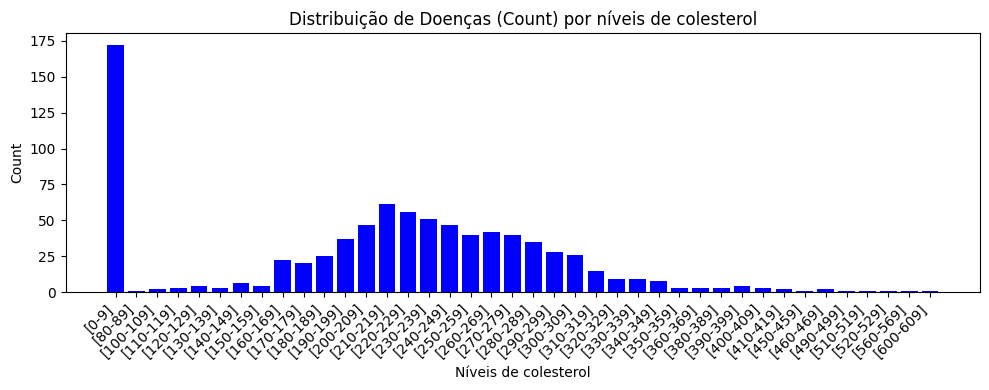

In [ ]:
labels_chol = list(cholesterol_range.keys())
values_chol = list(cholesterol_range.values())

# Filter out intervals with count 0
nonzero_labels_chol = [label for label, value in zip(labels_chol, values_chol) if value != 0]
nonzero_values_chol = [value for value in values_chol if value != 0]

fig2, ax2 = plt.subplots(figsize=(10, 4))
ax2.bar(nonzero_labels_chol, nonzero_values_chol, color='blue')
#ax2.bar(labels_chol, values_chol, color='blue')
ax2.set_xlabel('Níveis de colesterol')
ax2.set_ylabel('Count')
formatted_labels_chol = [f"[{label}]" for label in nonzero_labels_chol]
ax2.set_xticks(nonzero_labels_chol)
ax2.set_xticklabels(formatted_labels_chol, rotation=45, ha='right')
ax2.set_title('Distribuição de Doenças (Count) por níveis de colesterol')

plt.tight_layout()
fig2.savefig("/content/drive/MyDrive/Save/count_disease_vs_chol_level.png")


# If you intended to show the plot, keep the following line
plt.show()


Gráfico de Distribuição Doenças (%) por Níveis de colesterol

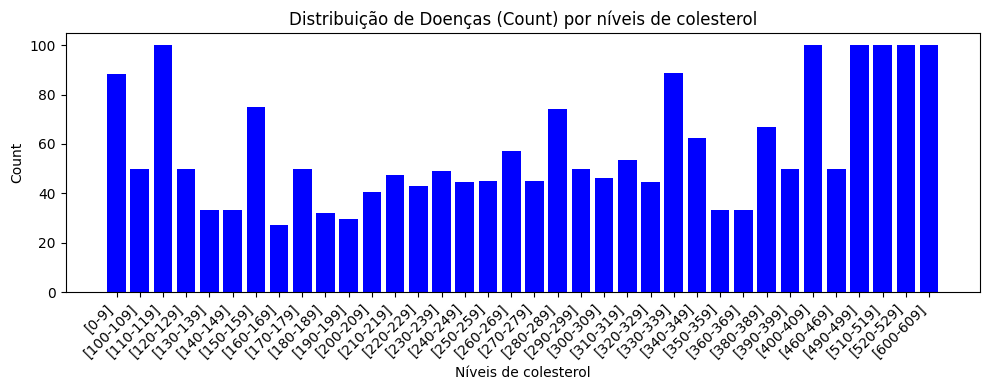

In [ ]:
labels_chol = list(cholesterol_range.keys())
percent_chol = cholesterol_disease_percentages

# Filter out intervals with count 0
nonzero_labels_chol = [label for label, value in zip(labels_chol, percent_chol) if value != 0]
nonzero_percent_chol = [value for value in percent_chol if value != 0]

fig2, ax2 = plt.subplots(figsize=(10, 4))
ax2.bar(nonzero_labels_chol, nonzero_percent_chol, color='blue')
#ax2.bar(labels_chol, percent_chol, color='blue')
ax2.set_xlabel('Níveis de colesterol')
ax2.set_ylabel('Count')
formatted_labels_chol = [f"[{label}]" for label in nonzero_labels_chol]
ax2.set_xticks(nonzero_labels_chol)
ax2.set_xticklabels(formatted_labels_chol, rotation=45, ha='right')
ax2.set_title('Distribuição de Doenças (Count) por níveis de colesterol')

plt.tight_layout()
fig2.savefig("/content/drive/MyDrive/Save/percent_disease_vs_chol_level.png")

# If you intended to show the plot, keep the following line
plt.show()




---

**c) Determinar se há alguma correlação signicativa entre a Tensão ou o Batimento e a ocorrência de doença;**

In [ ]:
#Inicialização das listas
list_test_a = []
list_test_b = []

# População lista A
for i in range(0, 21):
  list_test_a.append(i)

# População lista B
for i in range(20, -1, -1):
  list_test_b.append(i)

# Compreensão de Listas
list_test_x = [i for i in range(0, 21)]
list_test_y = [i for i in range(20, -1, -1)]


print("List Test X: ", list_test_x)
print("List Test Y: ", list_test_y)
print("")
print("Igual A-X: ", list_test_x == list_test_a)
print("Igual B-Y: ", list_test_y == list_test_b)

List Test X:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
List Test Y:  [20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

Igual A-X:  True
Igual B-Y:  True




---



Formula para calcular a média:

$$ X = \frac{1}{N} \sum _{i=1} ^ N x _i $$

Função, em python, para calcular a média de uma lista (int ou float):

In [ ]:
def mean(values: list[int or float]) -> int or float:
  sum_values = 0

  for element in values:
    sum_values += element

  return sum_values / len(values)

Versão pythônica da função mean:

In [ ]:
def mean_py(values: list[int or float]) -> int or float:
  return sum(values) / len(values)

Comparação dos resultados.

In [ ]:
print("Resultado \"mean\": ", mean(list_test_x))
print("Resultado \"mean_py\": ", mean_py(list_test_x))
print("Igual: ", mean(list_test_x) == mean_py(list_test_x))

Resultado "mean":  10.0
Resultado "mean_py":  10.0
Igual:  True




---



Formula para calcular a variância:

$$ σ^2 = \frac{\sum _{i=1} ^ N (x _i  - X)^2}{N} $$

Função, em python, para calcular a variância de uma lista (int ou float):

In [ ]:
def variance(values: list[int or float]) -> int or float:
  sum_values = 0
  mean_x = mean(values)

  for element in values:
    sum_values += (element - mean_x) ** 2

  return sum_values / len(values)

Versão pythônica da função variance:

In [ ]:
def variance_py(values: list[int or float]) -> int or float:
  return sum((element - mean(values)) ** 2 for element in values) / len(values)

Comparação dos resultados.


In [ ]:
print("Resultado \"variance\": ", variance(list_test_x))
print("Resultado \"variance_py\": ", variance_py(list_test_x))
print("Igual: ", variance(list_test_x) == variance_py(list_test_x))

Resultado "variance":  36.666666666666664
Resultado "variance_py":  36.666666666666664
Igual:  True




---


Formula para calcular o desvio padrão:

$$ σ = \sqrt \frac{\sum _{i=1} ^ N (x _i  - X)^2}{N} $$

Função, em python, para calcular o desvio padrão de uma lista (int ou float).

In [ ]:
def standard_deviation(values: list[int or float]) -> int or float:
  return variance_py(values) ** (1/2)

Versão pythônica da função standard_deviation:

In [ ]:
def standard_deviation_py(values: list[int or float]) -> int or float:
  return math.sqrt(variance_py(values))

Comparação dos resultados.

In [ ]:
print("Resultado \"standard_deviation\": ", standard_deviation(list_test_x))
print("Resultado \"standard_deviation_py\": ", standard_deviation_py(list_test_x))
print("Igual: ", standard_deviation_py(list_test_x) == standard_deviation(list_test_x))

Resultado "standard_deviation":  6.0553007081949835
Resultado "standard_deviation_py":  6.0553007081949835
Igual:  True




---


Formula para calcular a covariância:

$$ Cov(x,y) = \frac{\sum _{i=1} ^ N (x _i  - X) (y _i - Y)}{N} $$

Função, em python, para calcular a covariancia de duas listas (int ou float) de igual tamanho.

In [ ]:
def covariance(x: list[int or float], y: list[int or float]) -> int or float:
  sum_values = 0
  mean_x = mean(x)
  mean_y = mean(y)

  for i in range(len(x)):
    sum_values+= (x[i]- mean_x) * (y[i] - mean_y)

  return sum_values / len(x)

Versão pythônica da função covariance:

In [ ]:
def covariance_py(x: list[int or float], y: list[int or float]) -> int or float:
  return sum((x[i] - mean(x)) * (y[i] - mean(y)) for i in range(len(x))) / len(x)

Comparação dos resultados.

In [ ]:
print("Resultado \"covariance\": ", covariance(list_test_x, list_test_y))
print("Resultado \"covariance_py\": ", covariance_py(list_test_x, list_test_y))
print("Igual: ", covariance_py(list_test_x, list_test_y) == covariance(list_test_x, list_test_y))

Resultado "covariance":  -36.666666666666664
Resultado "covariance_py":  -36.666666666666664
Igual:  True




---



Formula para calcular a correlação:

$$ r(x,y) = \frac{\sum (x _i  - X) (y _i - Y)} {\sqrt {\sum (x _i  - X)^2} \sqrt {\sum (y _i  - Y)^2}} = \frac{cov(x,y)}{σ _x σ _y}$$

Função, em python, para calcular a correlação entre duas lista (int ou float) de igual tamanho.

In [ ]:
def correlation(x: list[int or float], y: list[int or float]) -> int or float:
  if len(x) != len(y):
    return None

  return covariance_py(x, y) / (standard_deviation_py(x) * standard_deviation_py(y))

Comparação dos resultados.

In [ ]:
print("Resultado \"correlation\": ", correlation(list_test_x, list_test_y))
print("Resultado \"scipy.stats.pearsonr\": ", scipy.stats.pearsonr(list_test_x, list_test_y).statistic)

Resultado "correlation":  -0.9999999999999998
Resultado "scipy.stats.pearsonr":  -1.0




---

População das lista e removoção de valores inválidos:


In [ ]:
list_idade = []
list_sexo = []
list_tensao = []
list_colesterol = []
list_batimento = []
list_doenca = []

for line in lines[1:]:
  data = line.strip().split(",")

  if int(data[0]) == 0 or int(data[2]) == 0 or int(data[3]) == 0 or int(data[4]) == 0:
    continue

  if data[1] == "M":
    list_sexo.append(1)
  elif data[1] == "F":
    list_sexo.append(0)
  else:
    print("Valor Inválido")

  list_idade.append(int(data[0]))
  list_tensao.append(int(data[2]))
  list_colesterol.append(int(data[3]))
  list_batimento.append(int(data[4]))
  list_doenca.append(int(data[5]))

In [ ]:
for element in list_idade:
  if element == 0:
    print("Valor invalido")

for element in list_tensao:
  if element == 0:
    print("Valor invalido")

for element in list_colesterol:
  if element == 0:
    print("Valor invalido")

for element in list_batimento:
  if element == 0:
    print("Valor invalido")

print("Length Idade: ", len(list_idade))
print("Length Sexo: ", len(list_sexo))
print("Length Tensao: ", len(list_tensao))
print("Length Colesterol: ", len(list_colesterol))
print("Length Batimento: ", len(list_batimento))
print("Length Doença: ", len(list_doenca))

Length Idade:  667
Length Sexo:  667
Length Tensao:  667
Length Colesterol:  667
Length Batimento:  667
Length Doença:  667




---

Correlação entre Idade e Doença:

In [ ]:
print("Correlação Idade - Doença: ", correlation(list_idade, list_doenca))
print("Correlação Idade - Doença: ", scipy.stats.pearsonr(list_idade, list_doenca).statistic)

Correlação Idade - Doença:  0.2990348151765639
Correlação Idade - Doença:  0.299034815176565




---

Correlação entre Sexo e Doença:

In [ ]:
print("Correlação Sexo - Doença: ", correlation(list_sexo, list_doenca))
print("Correlação Sexo - Doença: ", scipy.stats.pearsonr(list_sexo, list_doenca).statistic)

Correlação Sexo - Doença:  0.3167729022964226
Correlação Sexo - Doença:  0.31677290229642513




---

Correlação entre Tensão e Doença:

In [ ]:
print("Correlação Tensão - Doença: ", correlation(list_tensao, list_doenca))
print("Correlação Tensão - Doença: ", scipy.stats.pearsonr(list_tensao, list_doenca).statistic)

Correlação Tensão - Doença:  0.1951656512607898
Correlação Tensão - Doença:  0.19516565126078989




---

Correlação entre Colesterol e Doença:

In [ ]:
print("Correlação Colesterol - Doença: ", correlation(list_colesterol, list_doenca))
print("Correlação Colesterol - Doença: ", scipy.stats.pearsonr(list_colesterol, list_doenca).statistic)

Correlação Colesterol - Doença:  0.11721729495346082
Correlação Colesterol - Doença:  0.1172172949534611




---



Correlação entre Batimento e Doença:

In [ ]:
print("Correlação Batiemento - Doença: ", correlation(list_batimento, list_doenca))
print("Correlação Batiemento - Doença: ", scipy.stats.pearsonr(list_batimento, list_doenca).statistic)

Correlação Batiemento - Doença:  -0.3791350502344377
Correlação Batiemento - Doença:  -0.3791350502344381




---

**d) Visualizações, utilizando o matplotlib. Esta alínea foi resolvido ao decorrer da resolução das alíneas anteriores.**


---





### Template - HTML

In [ ]:
template = Template("""
<!DOCTYPE html>
<html>
<head>
    <title>Resultados da Análise de Doenças Cardíacas</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            margin: 0;
            padding: 0;
            background-color: #f2f2f2; /* cinza claro ao fundo */
        }

        .container {
            max-width: 800px;
            margin: 20px auto;
            text-align: justify; /* Justificar o texto */
            background-color: #ffffff; /* Colocar o fundo branco ao conteúdo */
            padding: 20px;
            border-radius: 10px; /* Adicionar cantos arrendondados ao conteúdo */
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); /* Adicionar uma sombra sutil à caixa */
        }

        .title-container {
            background-color: black;
            color: white;
            padding: 10px;
            border-radius: 10px; /* Adicionar cantos arredondados ao título */
            margin-bottom: 20px;
            text-align: center; /* centralizar o título */
        }

        .title-container h1 {
            font-size: 24px; /* Ajustar o tamanho da fonte para o título */
            margin: 0; /* Remover a margem padrão para o título */
            color: white;
        }

        .container h2, .container h3, .container h4 {
            margin-bottom: 20px; /* Adicionar margem abaixo dos cabeçalhos*/
        }

        .image-container {
            margin-top: 20px;
            margin-bottom: 20px;
            overflow: hidden; /* Ocultar o conteúdo excedente */
            text-align: center; /* centralizar as imagens */
        }

        .image-container img {
            max-width: 100%; /* Ajustar a largura máxima para controlar o tamanho da imagem */
            height: auto;
        }
    </style>
</head>
<body>
    <div class="container" id="overview">
        <div class="title-container">
            <h1>Resultados da Análise de Doenças Cardíacas</h1>
        </div>
        <h2>Datset: Myheart</h2>
        <ul>
            <li><h3>Total da amostra doente: {{ percentagemDeDoentes }}%</h3></li>
            <li><h3>Percentagem por Género:</h3>
                <ul>
                    <li><h4>Masculino: {{ PercentagemHomensDoentes}}%</h4></li>
                    <li><h4>Feminino: {{ PercentagemMulheresDoentes}}%</h4></li>
                </ul>
            </li>
        </ul>
    </div>

    <div class="container" id="data-exploration">
        <h2>Exploração dos Dados</h2>

        <div class="image-container">
            <img src="{{ image1 }}" alt="Gráfico de Distribuição por Idade">
        </div>

        <div class="image-container">
            <img src="{{ image2 }}" alt="Gráfico de Distribuição por Idade (%)">
        </div>

        <div class="image-container">
            <img src="{{ image3 }}" alt="Gráfico de Distribuição por Nível de Colesterol(%)">
        </div>
    </div>

    <div class="container" id="correlation">
      <h2>Correlação</h2>
        <ul>
          <li><h3>Correlação Idade - Doença: {{correlacaoIdadeDoenca}} </h3></li>
          <li><h3>Correlação Sexo - Doença: {{correlacaoSexoDoenca}} </h3></li>
          <li><h3>Correlação Tensão - Doença: {{correlacaoTensaoDoenca}} </h3></li>
          <li><h3>Correlação Colesterol - Doença: {{correlacaoColesterolDoenca}} </h3></li>
          <li><h3>Correlação Batiemento - Doença: {{correlacaoBatiementoDoenca}} </h3></li>
        </ul>
    </div>
</body>
</html>


""")

### Apresentação dos resultados numa página HTML

Os resultados obtidos foram visualizados e apresentados em um relatório HTML, o qual inclui gráficos e estatísticas calculadas. Para incorporar os resultados no HTML, utilizamos o mecanismo de renderização do template Jinja2.

O processo de renderização envolve a substituição de marcadores de posição no arquivo HTML por valores calculados durante o processamento de dados em Python.

In [ ]:
# função para converter imagem em um formato base64 Data URI, podendo ser utilizado em HTML e CSS
# para incorporar imagens diretamente no código, sem precisar de carregar a imagem de um arquivo externo
def image_to_data_uri(image_path):
    with open(image_path, "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode("utf-8")
    return f"data:image/png;base64,{encoded_image}"

# converter imagem  em um formati base64
image1_data_uri = image_to_data_uri("/content/drive/MyDrive/Save/patient_dot.png")
image2_data_uri = image_to_data_uri("/content/drive/MyDrive/Save/percent_disease_vs_age_range.png")
image3_data_uri = image_to_data_uri("/content/drive/MyDrive/Save/percent_disease_vs_chol_level.png")

Resultados salvos em 'index.html'



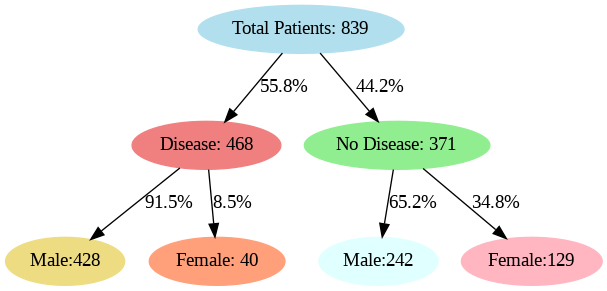
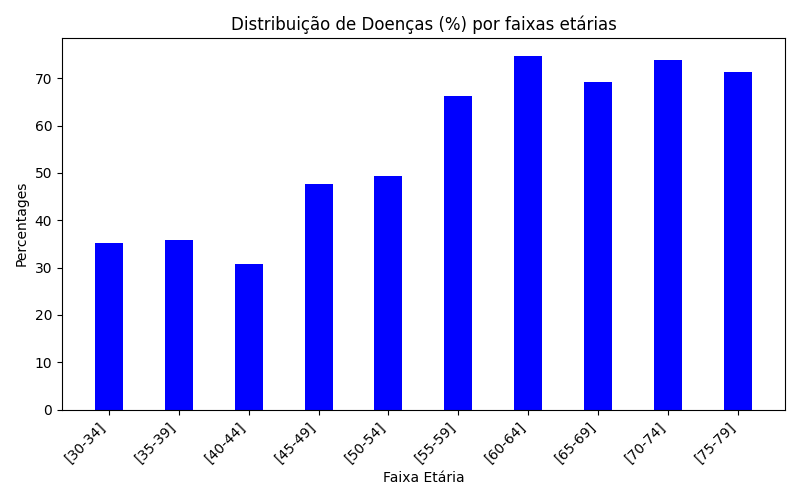
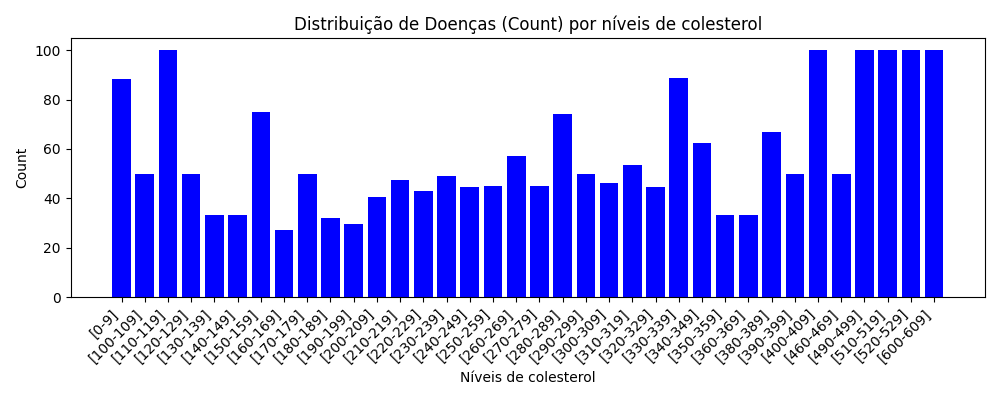

In [ ]:
# Renderizar o template com os resultados
html_content = template.render(
    percentagemDeDoentes=round((total_sick/total_patients*100), 2),
    PercentagemHomensDoentes=round(percent_male_sick),
    PercentagemMulheresDoentes=round(percent_female_sick),
    correlacaoIdadeDoenca = round(correlation(list_idade, list_doenca),3),
    correlacaoSexoDoenca = round(correlation(list_sexo, list_doenca),3),
    correlacaoTensaoDoenca = round(correlation(list_tensao, list_doenca),3),
    correlacaoColesterolDoenca = round(correlation(list_colesterol, list_doenca),3),
    correlacaoBatiementoDoenca = round(correlation(list_batimento, list_doenca),3),
    image1= image1_data_uri,
    image2= image2_data_uri,
    image3= image3_data_uri

)
# Gravar o conteúdo HTML em um arquivo
with open('/content/drive/MyDrive/Save/index.html', 'w') as html_file:
    html_file.write(html_content)
print("Resultados salvos em 'index.html'")

from IPython.display import HTML, display
display(HTML(html_content))

O método render da classe Template recebe chave-valor correspondentes aos marcadores de posição no template HTML. Esta chave-valor são substituídos no template, gerando um HTML final com os valores calculados e os gráficos incorporados.

Essa técnica proporciona uma maneira eficiente de criar relatórios dinâmicos, permitindo a personalização do conteúdo com base nos resultados obtidos durante a análise de dados.

---

# Conclusão

O trabalho em questão foi uma grande valia para conhecer mais sobre o python, principalmente a sua facilidade em escrever códigos, isto é, o python é flexível.
Além de otimizar os códigos, também foi expostos alternativas para alguns, com o intuíto de expressar a "simplicidade" de escrever numa linha ou duas o código python.

Em resumo, o trabalho foi bem interessante e a experiência ganha foi vísivel.